<a href="https://colab.research.google.com/github/joaoipiraja/AI-Auto-Enconder/blob/main/reducaoDimensionalidaImagens.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [18]:
import matplotlib.pyplot as plt
import numpy as np
from keras.datasets import mnist
from keras.models import Model,Sequential
from keras.layers import Input,Dense

In [19]:
(previsores_treinamento,_), (previsores_teste,_) = mnist.load_data()

In [20]:
previsores_treinamento = previsores_treinamento.astype('float32')/255
previsores_teste = previsores_teste.astype('float32')/255
previsores_treinamento = previsores_treinamento.reshape(len(previsores_treinamento), np.prod(previsores_treinamento.shape[1:]))
previsores_teste = previsores_teste.reshape(len(previsores_teste), np.prod(previsores_teste.shape[1:]))

In [21]:
fator_compactacao = 784/32

In [ ]:
autoencoder = Sequential()
autoencoder.add(Dense(units=32, activation='relu', input_dim = 784))
autoencoder.add(Dense(units=784, activation = 'sigmoid'))
autoencoder.compile(optimizer='adam', loss='binary_crossentropy', metrics=['accuracy'])
autoencoder.fit(previsores_treinamento,previsores_treinamento, epochs=50, batch_size=256,validation_data=(previsores_teste,previsores_teste))

In [ ]:
dimensaoOriginal = Input(shape=(784,))
camada_encoder = autoencoder.layers[0]
encoder = Model(dimensaoOriginal, camada_encoder(dimensaoOriginal))
encoder.summary()

In [26]:
imagensCodificadas = encoder.predict(previsores_teste)
imagensDecodificadas = autoencoder.predict(previsores_teste)

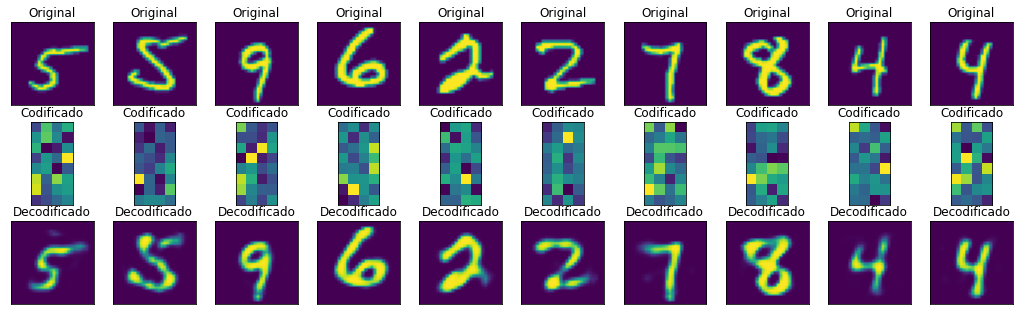

In [31]:
numeroImagens = 10
imagensTeste = np.random.randint(previsores_teste.shape[0], size = numeroImagens) #Seleciona 10 imagens no intervalo de previsores_teste.shape[0]
plt.figure(figsize=(18,18))
for i, indiceImagem in enumerate(imagensTeste):
    eixo = plt.subplot(10,10,i+1) #linhas,colunas,indice para imagem
    plt.title("Original")
    plt.imshow(previsores_teste[indiceImagem].reshape(28,28))
    plt.xticks(()) #Remove eixo x
    plt.yticks(()) #Remove eixo y

    eixo = plt.subplot(10,10,i+1+numeroImagens) #linhas,colunas,indice para imagem
    plt.title("Codificado")
    plt.imshow(imagensCodificadas[indiceImagem].reshape(8,4))
    plt.xticks(()) #Remove eixo x
    plt.yticks(()) #Remove eixo y

    eixo = plt.subplot(10,10,i+1+numeroImagens*2) #linhas,colunas,indice para imagem
    plt.title("Decodificado")
    plt.imshow(imagensDecodificadas[indiceImagem].reshape(28,28))
    plt.xticks(()) #Remove eixo x
    plt.yticks(()) #Remove eixo y